<a href="https://colab.research.google.com/github/Acgonzalezt/Examen_Final_Statistical_II/blob/main/Examen_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [ ]:
dataset = pd.read_csv('BankChurners.csv')

In [ ]:
!pip install summarytools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8572 sha256=5ade97df9903acbf6fa6503c62f89856fcd4393760b5ca62efd308872f3f050b
  Stored in directory: /root/.cache/pip/wheels/d5/8a/5d/008e2127a7f9dd64d066f16e5ea268fa52823dc929c982d6f1
Successfully built summarytools


In [ ]:
# visualizar summary tools del dataset
from summarytools import dfSummary
dfSummary(dataset)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

Utilización de las variables:
* Customer_Age: Edad del cliente
* Avg_Open_To_Buy: Línea de Crédito Abierta para Comprar
* Total_Revolving_Bal: Saldo rotativo del total de la tarjeta

In [ ]:
import seaborn as sns

In [ ]:
columnas_deseadas = ['Customer_Age', 'Avg_Open_To_Buy','Total_Revolving_Bal']
data = dataset[columnas_deseadas]
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
2,Avg_Open_To_Buy[float64],Mean (sd) : 7469.1 (9090.7)min < med < max:3.0 < 3474.0 < 34516.0IQR (CV) : 8534.5 (0.8),"6,813 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC0ElEQVR4nO3dP2/aQByH8e9BQAbSM4g22Vg6MFTqkJGl7yAvtmu3DuRVMHSLUCLiCDcUy9AlVJXaAj6LPz/3+cy5M7IeGZtzdG69Xgs4d7VTfwBgHxe7/sA515LUDJx/uV6vXwLHAr9sDdU51+r3+7fe+17I5M/PzzPn3GdiRVm7rqhN731vNBq9xHG8KDJxkiTReDzuPT4+NiURKkrZ+dUvSXEcL66urr4HzN8KGAP8gYcpmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYsNfOfaHyPG9I8s650CnY9BeSDhhqmqaNLMs+DgaDer1eL7SP6gab/mLjYKEul8uLKIraNzc3i+vr61nR8Wz6i98d9KtfkjqdTuiGvxKb/uIVD1MwgVBhAqHCBEKFCYQKEw7+1F9GyQUDFgsq5GxDLbtgwGJBtZxtqGUWDFgsqJ6zDXWjxIIBiwUVwsMUTDj7K2oo3tw6PudcS1IzcPjW813JUHlz6/icc61+v3/rve+FjN91visZKm9unUTTe98bjUYvcRwXujjsc74rGepGmTe38jz34jfcwuI4PsjDb6VDDVX21uHp6WnunPsiKeS247+NfBtC/Ysytw739/dv7u7uPg0Gg7cniFyqaOiEukXIrcNsNmudKnKpdOg1SauQ40ryq9WqETh2J0I9kGNHLpULPc/zRpqm7y8vLye1Wi0reuwsy6I8zz8sFouvkkL/o+Of9go1SZKo6MTz+TySpDRNo+l02j7meKvH3owNlWXZRRRF7eFw6Lrd7o8iYx8eHqLJZPJuOBx+63a786LHfh3fTpKkM51Ol0XG7tPXT0ewbupWWAyNAAAAAElFTkSuQmCC"">",0(0.0%)
3,Total_Revolving_Bal[int64],Mean (sd) : 1162.8 (815.0)min < med < max:0.0 < 1276.0 < 2517.0IQR (CV) : 1425.0 (1.4),"1,974 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACs0lEQVR4nO3dPY7aQBiA4W/CggxItvgRdFxgpS2QaDhAyhw2R0hBkZob0CEhZISzFsZ4q0SKwi54xrP4c96n3jEuXoPHOxqboigEqLsvjz4B4B5Pt/7AGNMVkY7l8U9FUbxajgX++DBUY0x3NBp9C8NwYHPww+GwN8Z8J1a4uvWN2gnDcLBcLl+jKErLHDiO42C1Wg12u11HRAgVTm7+9IuIRFGUTiaTXxbH71qMAf7BZAoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChwl27+eHzOG6cLNLQzZMJ1QOH2ILhcPg1iqK+7Wc3dfNkQq2Yyy7dWZYFIvK8WCx+jsfjQ9nxTd48mVCrZ71L92azGazX614QBJnlxskiDd08mVA9sdmle7/fNzKyKjDrhwp8o77DYUIUXi6XdtXn878j1CtcJ0R5nj+nafpDRGzvM63led4WkdAYYzO8to+2CPU65wnR+Xxu+Tq59yRJ0s6y7GU2m7VarVap8xap96MtQv2AtgnR6XR6CoKgN5/P0+l0ui8ztopHWz7f8kioDdTv9z/9vWC+3/LY2FAdr24mROV5fctjI0N1vbofPSHSzNdbHhsZqjhc3SKPnRDhuqaGKiL2Vzf/IaqfRoeKchyfwXq9rydUiIj7M1jf9/WEChFxewYr4v++nlDxF9tnsL7v61k9BRUIFSoQKlSo9T0qa0LxW21D1bwmFNWrbaiidE0o/KhzqCKib00o/GAyBRUIFSoQKlQgVKhAqFDB66y/zusboYu3UOu+vhG6eAu17usboctdocZxHJQ98PF4LD3mmiRJgu1227P5bJuxruMfNVbzZ9/T1xtWxo0ZLNRuyAAAAABJRU5ErkJggg=="">",0(0.0%)


<Axes: xlabel='Customer_Age', ylabel='Count'>

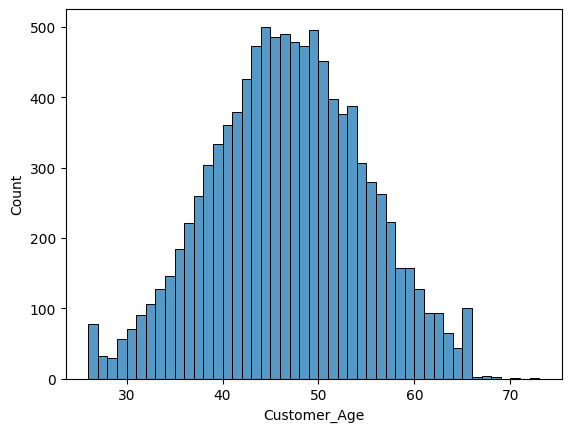

In [ ]:
# histograma de la variabel Income_Category, para visualizar los datos contenidos en la variable
sns.histplot(data=data, x='Customer_Age')

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Count'>

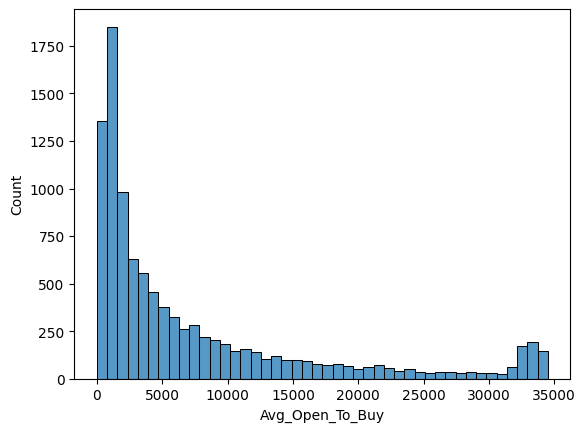

In [ ]:
# Histograma de la variable Credit_Limit
sns.histplot(data=data, x='Avg_Open_To_Buy')

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

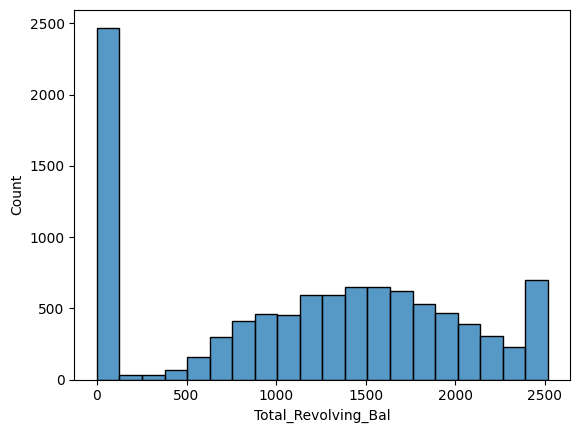

In [ ]:
#Histograma de la variable Total_Trans_Amt
sns.histplot(data=data, x='Total_Revolving_Bal')

In [ ]:
# descripción de los datos que contiene el data_clean
data.describe()

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal
count,10127.000000,10127.000000,10127.000000
mean,46.325960,7469.139637,1162.814061
std,8.016814,9090.685324,814.987335
min,26.000000,3.000000,0.000000
25%,41.000000,1324.500000,359.000000
50%,46.000000,3474.000000,1276.000000
75%,52.000000,9859.000000,1784.000000
max,73.000000,34516.000000,2517.000000


<Axes: >

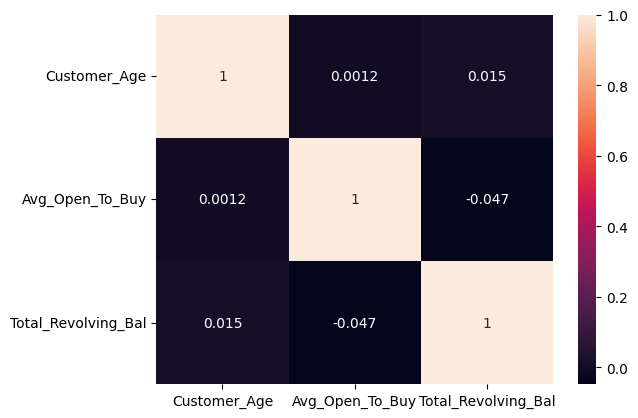

In [ ]:
#Revisión de correlación de las variables
sns.heatmap(data[['Customer_Age','Avg_Open_To_Buy','Total_Revolving_Bal']].corr(), annot=True)

Método IQR

In [ ]:
#Función para iterar en las columnas de data_clean, obtener el Quartil 1 y 3
# los cuartiles se calculan con el valor de los datos y no la posición

for col in data.columns:
    column = data[col]

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1

    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))

    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =41.0 Q3=52.0 IQR =11.0 umbral_inferior = 24.5 umbral_superior =68.5
Q1 =1324.5 Q3=9859.0 IQR =8534.5 umbral_inferior = -11477.25 umbral_superior =22660.75
Q1 =359.0 Q3=1784.0 IQR =1425.0 umbral_inferior = -1778.5 umbral_superior =3921.5


<ipython-input-29-dbcc8205200f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))
<ipython-input-29-dbcc8205200f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))
<ipython-input-29-dbcc8205200f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Las escalas en las que se encuentran las columnas tambien puede afectar el modelo

In [ ]:
#visualización del dataset creado en la formula anterior, definiendo los datos outliers
data

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal,Customer_Age_outliers,Avg_Open_To_Buy_outliers,Total_Revolving_Bal_outliers
0,45,11914.0,777,False,False,False
1,49,7392.0,864,False,False,False
2,51,3418.0,0,False,False,False
3,40,796.0,2517,False,False,False
4,40,4716.0,0,False,False,False
...,...,...,...,...,...,...
10122,50,2152.0,1851,False,False,False
10123,41,2091.0,2186,False,False,False
10124,44,5409.0,0,False,False,False
10125,30,5281.0,0,False,False,False


In [ ]:
#formula para visualizar la cantida de outliers en cada columna
data.groupby(by='Customer_Age_outliers').count()

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal,Avg_Open_To_Buy_outliers,Total_Revolving_Bal_outliers
Customer_Age_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [ ]:
data.groupby(by='Avg_Open_To_Buy_outliers').count()

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal,Customer_Age_outliers,Total_Revolving_Bal_outliers
Avg_Open_To_Buy_outliers,,,,,
False,9164,9164,9164,9164,9164
True,963,963,963,963,963


In [ ]:
data.groupby(by='Total_Revolving_Bal_outliers').count()

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal,Customer_Age_outliers,Avg_Open_To_Buy_outliers
Total_Revolving_Bal_outliers,,,,,
False,10127,10127,10127,10127,10127


In [ ]:
# quitamos los valores outliers de cada columnas
data_noout =  data[data['Customer_Age_outliers'] == False]
data_noout = data_noout[data_noout['Avg_Open_To_Buy_outliers'] == False]
data_noout = data_noout[data_noout['Total_Revolving_Bal_outliers'] == False]
data_noout.reset_index(drop=True)

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal,Customer_Age_outliers,Avg_Open_To_Buy_outliers,Total_Revolving_Bal_outliers
0,45,11914.0,777,False,False,False
1,49,7392.0,864,False,False,False
2,51,3418.0,0,False,False,False
3,40,796.0,2517,False,False,False
4,40,4716.0,0,False,False,False
...,...,...,...,...,...,...
9157,50,2152.0,1851,False,False,False
9158,41,2091.0,2186,False,False,False
9159,44,5409.0,0,False,False,False
9160,30,5281.0,0,False,False,False


In [ ]:
# resumen de la nueva data data_noout
data_noout.describe()

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal
count,9162.000000,9162.000000,9162.000000
mean,46.320127,5046.156418,1162.722222
std,8.136861,5306.448173,815.668247
min,26.000000,3.000000,0.000000
25%,41.000000,1155.000000,357.000000
50%,46.000000,2850.000000,1276.000000
75%,52.000000,7290.500000,1783.000000
max,68.000000,22616.000000,2517.000000


Histogramas de las variables con el nuevo dataset data_noout, el cual no contiene los outliers

<Axes: xlabel='Customer_Age', ylabel='Count'>

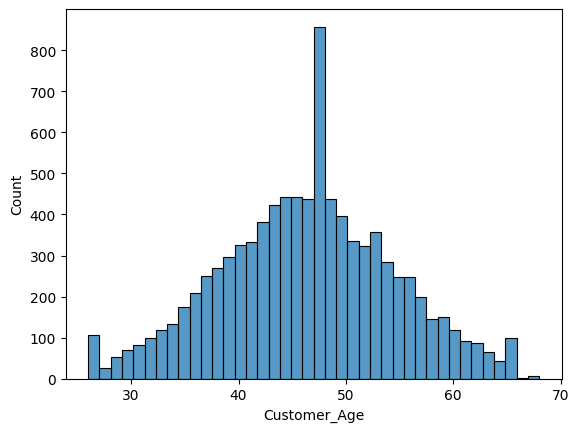

In [ ]:
sns.histplot(data=data_noout, x='Customer_Age')

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Count'>

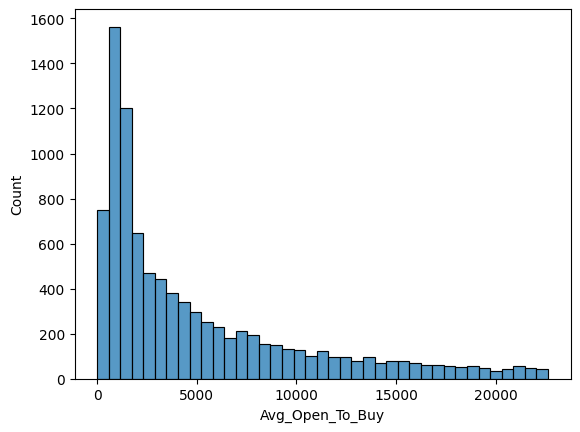

In [ ]:
sns.histplot(data=data_noout, x='Avg_Open_To_Buy')

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

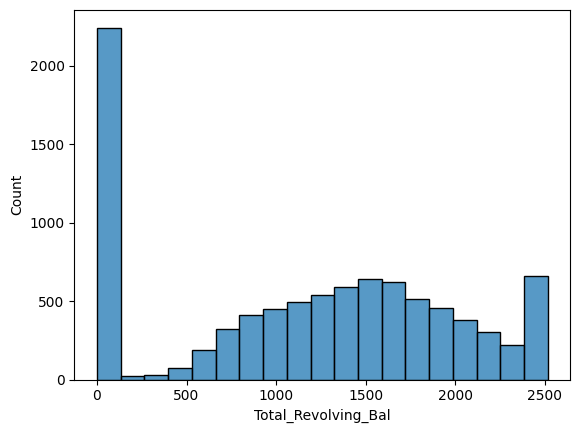

In [ ]:
sns.histplot(data=data_noout, x='Total_Revolving_Bal')

In [ ]:
data_noout=data_noout[['Customer_Age','Avg_Open_To_Buy','Total_Revolving_Bal']]
data_noout

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal
0,45,11914.0,777
1,49,7392.0,864
2,51,3418.0,0
3,40,796.0,2517
4,40,4716.0,0
...,...,...,...
10122,50,2152.0,1851
10123,41,2091.0,2186
10124,44,5409.0,0
10125,30,5281.0,0


In [ ]:
dfSummary(data_noout)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Customer_Age[int64],Mean (sd) : 46.3 (8.1)min < med < max:26.0 < 46.0 < 68.0IQR (CV) : 11.0 (5.7),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkklEQVR4nO3cQW7aQBSA4Td1QAYkWwgJdlygUhYsOUQP2yN0wQm4ATskhIxwY2GMs6gqEYkmYHua9yb/tzfx4hfBnpnn6roWQLtvn30DwD2ePvsGQuScG4hIv+Hlp7quX7q8nxAQasecc4PJZPIjSZJxk+sPh8PeOfeTWN8i1O71kyQZL5fLlzRNi0cuzLIsXq1W491u1xcRQr1CqJ6kaVpMp9PfDS4ddH4zAeBhCiYQKkwgVJhAqDCBUGECocIEXk/9Q4vVpeRyufS6vp+vjlBvaLO6VJZlXFXV96IofolIk/eouIFQb2u8urTZbMbr9Xp4Pp8jXzf3FRHqO5qsLu33e1aWPOBhCiYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmBLsy1fLIMhtLlAky1LZHltlYok+QoUqLTSUibCzRKNRQRaT5kWU2lugTdKgWVVXVE5HEOdf0I4IcCUSoiuR53ivL8nk+n0dRFD38k0Uk3JFAhKrI6XR6iuN4uFgsitlstn/0+pBHAhGqQqPRqOk4IJFARwLxwh8mECpMIFSYQKgwgVBhAqHCBNWvpxirg7/UhspYHVxTG6owVgdXNIcqIozVwR88TMEEQoUJ6v/14zEt97Oq3ctKqAFpu59V815WQg1Im/2s2veyEmqAWuxnVfu2hIcpmECoMIFQYQKhwgRChQmEChO8vp5ioh664i1UJuqhSz6/UZmoZ4zmuVfeV6aYqGeD9rlXLKFCRPTPvSJUvKF17tWHoXISFBq8GyonQaHFR9+onASFCnf9RuUkKO7h8xgMD1PohO9jMISKTvg+BkOo6JSvYzDsnoIJd32jZlkWP/rBx+MxFhHJ8zzebrfD/3m91b9t9b7bXn9PX69kErL1VkXW2wAAAABJRU5ErkJggg=="">",0(0.0%)
2,Avg_Open_To_Buy[float64],Mean (sd) : 5046.2 (5306.4)min < med < max:3.0 < 2850.0 < 22616.0IQR (CV) : 6135.5 (1.0),"6,032 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjElEQVR4nO3dP2/aQBiA8fcgIBOoLUQCm5fuHTyy9Bv0w3btiARfgKFLJxaEZIERThDIdZdSVUrEn7s48Xt6fnPOZng44jtLZ8qyFKDuGh/9AYBr3F36A2NMR0Taltc/lGX5bDkW+OdsqMaYzmAw+BaGYd/m4tvtdm2M+U6scHVpRm2HYdgfj8fPURTtb7lwlmXBdDrtp2naFhFChZOLP/0iIlEU7YfD4ZPF9TsWY4AXeJiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS46rAJW0VRtEQkNMbYXoJzqiAiFYaa53nreDx+ieO42Ww2bzr654RzqnBSWaiHw+EuCIL7JEn2o9Fofet4zqnC/yr96RcR6Xa7tmdUiXBOFf7iYQoqECpUIFSoQKhQgVChAqFCBUKFCpWvo7pw3IJl+9UjtQ3VdQuW7Ve/1DZUly1Ytl/9U9tQTxy2YNl+9UjtQ7XFK4Z+8TJUXjH0j5eh8oqhf7wM9YRXDP3hdaguWMOtF0J9BWu49UOor3Bdw51MJsM0TR+MMVub2xP4S4R6hs3/uK6z8Waz2RljfoiI1WqFeBo6ob4xl9l4uVx+ms1mX+M4frBdVnMMvbaRE2pFbGbj9XrdcVlWcw39DWbzhoj8thx79ktCqDVku6zmErpr5EVRtPI8/9zr9X41Go3jreMvPYASqoc+YjZfLBb9+Xz+mCTJzypeIroq1CzLgltuLCKy2+0CEZE8z4PVanX/nuO13rsOn7uu/gCYaYZfM6j09wAAAABJRU5ErkJggg=="">",0(0.0%)
3,Total_Revolving_Bal[int64],Mean (sd) : 1162.7 (815.7)min < med < max:0.0 < 1276.0 < 2517.0IQR (CV) : 1426.0 (1.4),"1,929 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dP47aQBSA8TdhQQYkW/wRdFxgpS2QaDhAyhw2R0hBkZob0CEhZISzFsZ4q0SKwi54xrP4Od+v3jEUn2EftsamKAoB6u7Lo98AcI+nW39gjOmKSMfy+KeiKF4t1wJ/fBiqMaY7Go2+hWE4sDn44XDYG2O+Eytc3fpE7YRhOFgul69RFKVlDhzHcbBarQa73a4jIoQKJze/+kVEoihKJ5PJL4vjdy3WAP9gmIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSocNdufvg8jhsnizR082RC9cAhtmA4HH6Noqhv+9pN3TyZUCvmskt3lmWBiDwvFouf4/H4UHZ9kzdPJtTqWe/SvdlsBuv1uhcEQWa5cbJIQzdPJlRPbHbp3u/3jYysCkz9UIFP1Hc4DETh5XJpV/1+/neEeoXrQJTn+XOapj9ExPb/TGt5nrdFJDTG2Cyv7U9bhHqd80B0Pp9bvt7ce5IkaWdZ9jKbzVqtVqvU+xap909bhPoBbQPR6XR6CoKgN5/P0+l0ui+ztoqftnw+5ZFQG6jf73/6c8F8P+WxsaE6nt0MROV5fcpjI0N1PbsfPRBp5uspj40MVRzObpHHDkS4rqmhioj92c0VovrhyhRUaPQnKspxvFjgdQAlVIiI+8UC3wMooUJE3C4WiPgfQAkVf7G9WOB7AGWYggqEChVq/dXPPaH4rbahar4nFNWrbaii9J5Q+FHnUEVE3z2h8INhCioQKlQgVKhAqFCBUKGC16m/zreNQRdvodb9tjHo4i3Uut82Bl3uCjWO46DsgY/HY+k11yRJEmy3257Na9usdV3/qLWaX/uevt4AvbiNGUZ6VkEAAAAASUVORK5CYII="">",0(0.0%)


Visualización de la data en base a la edad de los cliente

<Axes: xlabel='Total_Revolving_Bal', ylabel='Avg_Open_To_Buy'>

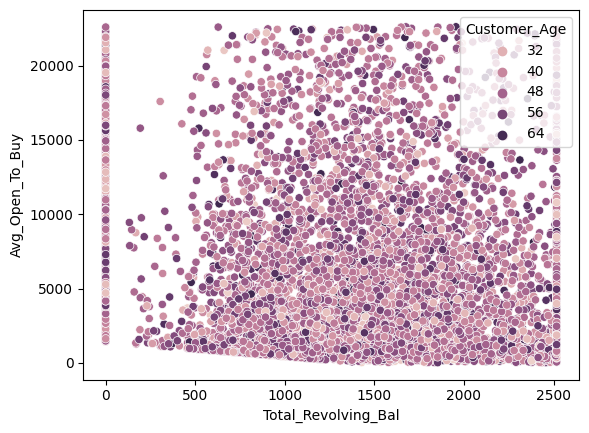

In [ ]:
import seaborn as sns

sns.scatterplot(data = data_noout, x = 'Total_Revolving_Bal', y = 'Avg_Open_To_Buy', hue = 'Customer_Age')

Creación del modelo en base al algoritmo KMeans, crea una instancia de tres clústeres, un estado aleatorio de 0 e inicialización automática. Luego vamos a ajustar el modelo a los datos de entrenamiento normalizados usando el método fit().

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(data_noout)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [ ]:
import seaborn as sns

Visualización de los datos que se ajustaron

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Total_Revolving_Bal'>

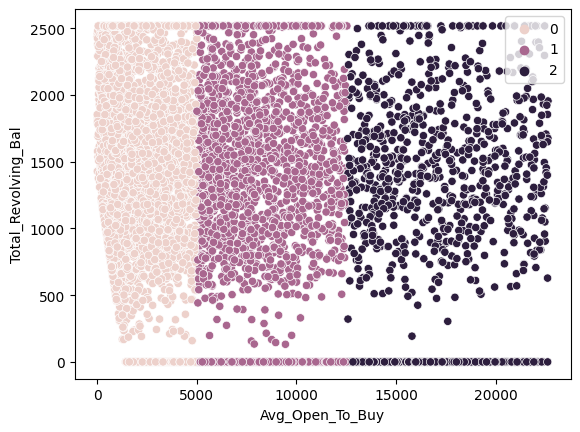

In [ ]:
sns.scatterplot(data = data_noout, x = 'Avg_Open_To_Buy', y = 'Total_Revolving_Bal', hue = kmeans.labels_)

Vemos que los datos ahora están claramente divididos en 3 grupos distintos.

<Axes: ylabel='Customer_Age'>

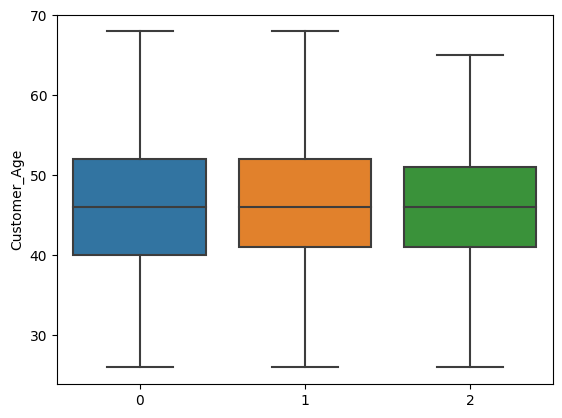

In [ ]:
sns.boxplot(x = kmeans.labels_, y = data_noout['Customer_Age'])

Evaluación del rendimiento del algoritmo de agrupamiento utilizando una puntuación de Silhouette, que es una parte en la sklearn.metricsque una puntuación más baja representa un mejor ajuste. Es la distancia entre una muestra y el grupo más cercano del que la muestra no forma parte.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data_noout, kmeans.labels_, metric='euclidean')

0.6152569446838496

Elegir el mejor número de clústers

In [ ]:
K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_noout)

    fits.append(model)

    score.append(silhouette_score(data_noout, model.labels_, metric='euclidean'))

Visualizamos con dos clústers

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Total_Revolving_Bal'>

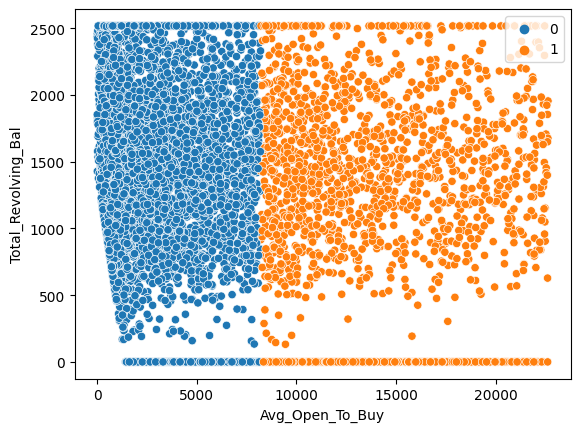

In [ ]:
sns.scatterplot(data = data_noout, x = 'Avg_Open_To_Buy', y = 'Total_Revolving_Bal', hue = fits[0].labels_)

Visualización con 4 clústers

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Total_Revolving_Bal'>

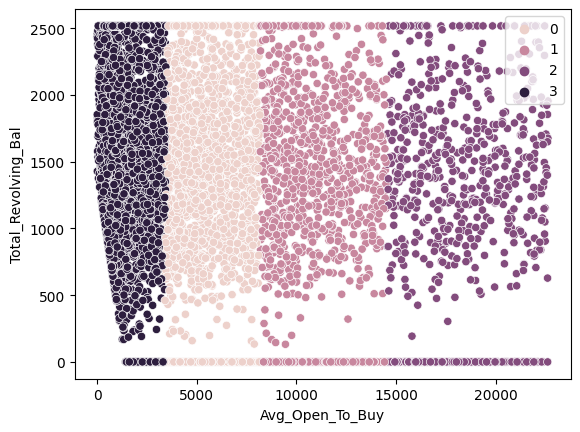

In [ ]:
sns.scatterplot(data = data_noout, x = 'Avg_Open_To_Buy', y = 'Total_Revolving_Bal', hue = fits[2].labels_)


Visualización con 7 clústers

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Total_Revolving_Bal'>

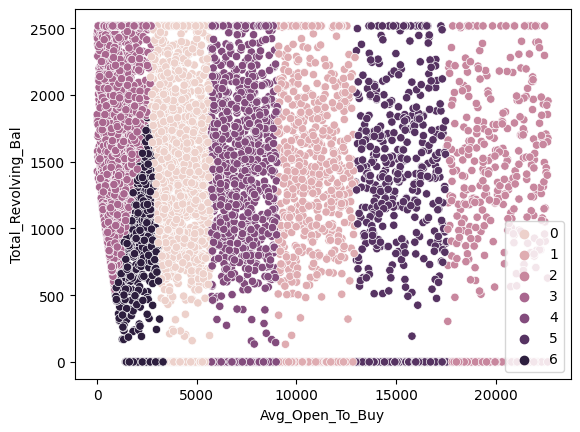

In [ ]:
sns.scatterplot(data = data_noout, x = 'Avg_Open_To_Buy', y = 'Total_Revolving_Bal', hue = fits[5].labels_)

Para seleccionar la cantidad de clúster que utilizaremos un gráfico de codo donde el eje y es una medida de bondad de ajuste y el eje x es el valor de k.

<Axes: >

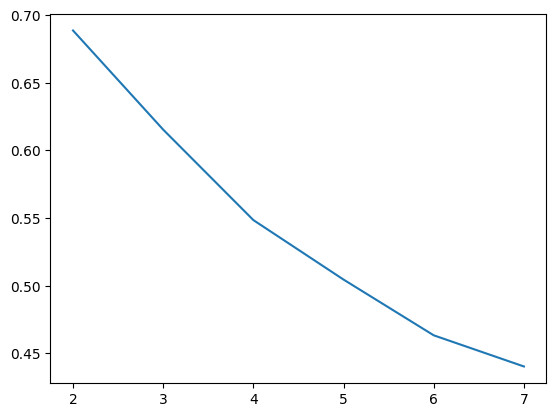

In [ ]:
sns.lineplot(x = K, y = score)

Visualizamos que 5 clústers permiten que el modelo se cree sin sobreajustes

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Total_Revolving_Bal'>

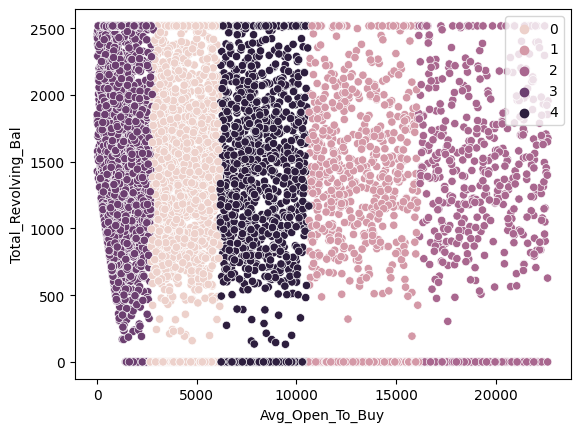

In [ ]:
sns.scatterplot(data = data_noout, x = 'Avg_Open_To_Buy', y = 'Total_Revolving_Bal', hue = fits[3].labels_)

<Axes: ylabel='Customer_Age'>

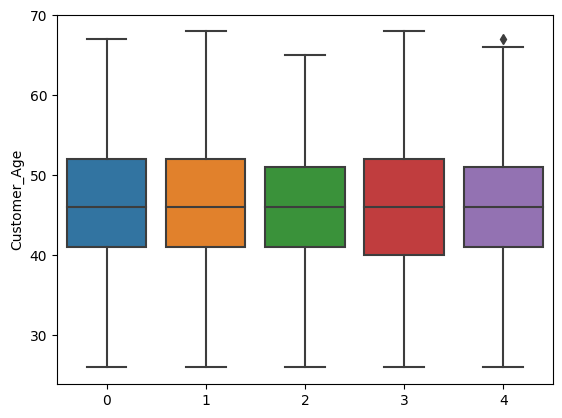

In [ ]:
sns.boxplot(x = fits[3].labels_, y = data_noout['Customer_Age'])

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(data_noout)

KMeans(n_clusters=5, n_init='auto', random_state=0)

In [ ]:
labels = kmeans.labels_

In [ ]:
data_noout['cluster'] = labels
data_noout.groupby(by='cluster').count()

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal
cluster,,,
0,2016,2016,2016
1,842,842,842
2,572,572,572
3,4475,4475,4475
4,1257,1257,1257


In [ ]:
data_noout.describe()

,Customer_Age,Avg_Open_To_Buy,Total_Revolving_Bal,cluster
count,9162.000000,9162.000000,9162.000000,9162.000000
mean,46.320127,5046.156418,1162.722222,2.230845
std,8.136861,5306.448173,815.668247,1.398643
min,26.000000,3.000000,0.000000,0.000000
25%,41.000000,1155.000000,357.000000,1.000000
50%,46.000000,2850.000000,1276.000000,3.000000
75%,52.000000,7290.500000,1783.000000,3.000000
max,68.000000,22616.000000,2517.000000,4.000000


In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter_3d(data_noout, x='Avg_Open_To_Buy',
                  y='Total_Revolving_Bal',
                  z='Customer_Age',
                  color='cluster')
fig.show()

Clasificación de 5 clústers:
* 0 Avg_Open_To_Buy= 4.305k, Total Revolving_Bal= 1798, Customer_Age=58 y Color =azul
* 1 Avg_Open_To_Buy= 13.698k, Total Revolving_Bal= 2000, Customer_Age=61 y Color =morado
* 2 Avg_Open_To_Buy= 19.022k, Total Revolving_Bal= 1936, Customer_Age=45 y Color =rosado
* 3 Avg_Open_To_Buy= 490k, Total Revolving_Bal= 1789, Customer_Age=65 y Color =naranja
* 4 Avg_Open_To_Buy= 8.416k, Total Revolving_Bal= 1307, Customer_Age=54 y Color =amarillo
